In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
df = pd.read_csv("/Users/ksr/Datasets/digit-recognizer/train.csv")#reading the dataset

In [3]:
df.head(5)#first 5 rows of dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target = df["label"]#stroing label in target variable
df.drop("label",axis = 1,inplace = True)#deleting label in the df

In [5]:
df.shape

(42000, 784)

In [6]:
target.shape

(42000,)

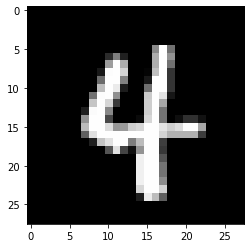

4


In [7]:
#display one of the image 
random = np.random.randint(0,42000)#generating random number in the range of data size
data = df.iloc[random].to_numpy().reshape(28,28)#to_numpy is same as as_matrix
plt.imshow(data,cmap="gray")
plt.show()
print(target[random])#label of the image

In [8]:
#standarising the data
#x-xmean/xs.d
df = StandardScaler().fit_transform(df)

In [9]:
df.shape

(42000, 784)

In [10]:
pca = decomposition.PCA() #decomposition is present in sklearn.

In [11]:
pca.n_components = 2#selecting 2 components
pca_data = pca.fit_transform(df)

In [12]:
pca_data.shape

(42000, 2)

In [13]:
pca_data = np.vstack((pca_data.T, target)).T #adding labels to the list/array

In [14]:
df_new = pd.DataFrame(data = pca_data,columns=("p1","p2","labels"))#converting into list/array to data frame

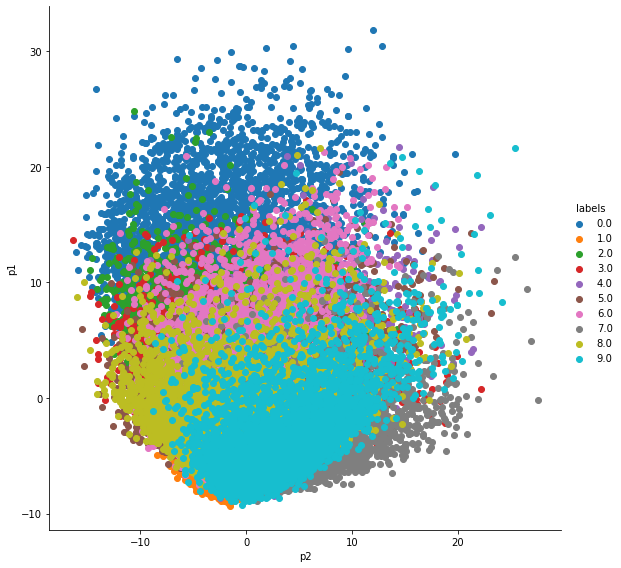

In [15]:
sns.FacetGrid(data = df_new,hue="labels",height = 8).map(plt.scatter,"p2","p1").add_legend()